# The Music of the Sphere: 100 Posterior Sample Planck CMB Temperature Maps, and their Spherical Harmonic Decompositions

*Laurence Perreault Levasseur, Phil Marshall, and Roger Blandford, January 2016*

In this notebook we generate a mock Universe and use the likelihood from Music allegro paper to reconstruct the 3D map of the interior sphere.

To do this we make use of 100 posterior sample Commander Planck CMB temperature maps to calculate the $a_lm$'s covariance matrix, and use a prior for the $f_n$'s constructed from a primordial power spectrum with amplitude given by Planck and a spectral index of 0.97. To do the reconstruction we do not use a mask on the T map and use SVD to deal with all ill-conditioned matrices.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import math
import beatbox
import os.path

1


In [3]:
You=beatbox.Multiverse(truncated_nmax=3, truncated_nmin=1, truncated_lmax=10, truncated_lmin=1)
beatbox.You.create_original_Universe()
beatbox.You.initiate_simulated_universe()

Generated  122  potential Fourier coefficients
 with phases uniformly distributed between 0 and  3.14159265359
Built potential grid, with dimensions  (41, 41, 41)  and mean value  0.0 +/- 8.9e-06


beatbox/universe.py:525: RuntimeWarning: divide by zero encountered in power
  self.Power_Spectrum = self.PSnorm*np.power((self.k/self.kstar) ,(-3+(self.n_s-1)))


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


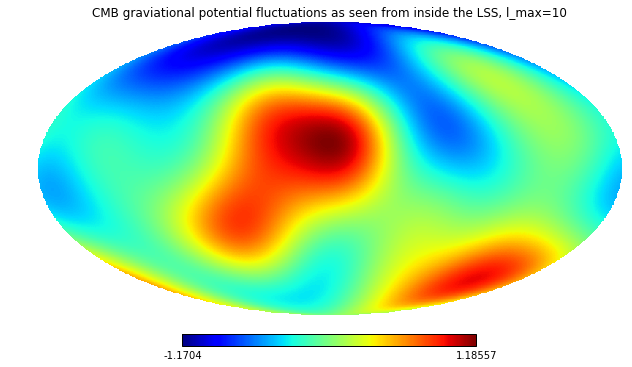

In [4]:
%matplotlib inline
import healpy as hp
beatbox.You.all_simulated_universes[0].show_CMB_T_map(from_perspective_of="observer")

In [5]:
if not os.path.isfile('data/covCyy.txt'):
    beatbox.You.read_Planck_samples()
    beatbox.You.calculate_covariance_matrix()
else:
    beatbox.You.load_covariance_matrix(filename='covCyy.txt')

In [6]:
beatbox.You.calculate_sdv_Cyy_inverse()

In [7]:
# Use the simulated Universe as mock data
datamap=beatbox.You.all_simulated_universes[0].ay2ayreal_for_inference(beatbox.You.all_simulated_universes[0].ay)

beatbox/universe.py:383: ComplexWarning: Casting complex values to real discards the imaginary part
  ay_real[zero_ind] = value[zero_ind].astype(np.float)


In [8]:
# Reconstruct the potential
beatbox.You.solve_for_3D_potential(datamap)

beatbox/multiverse.py:283: ComplexWarning: Casting complex values to real discards the imaginary part
  R_real[zero_ind,:] = beatbox.Universe.R[zero_ind,:].astype(np.float)


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


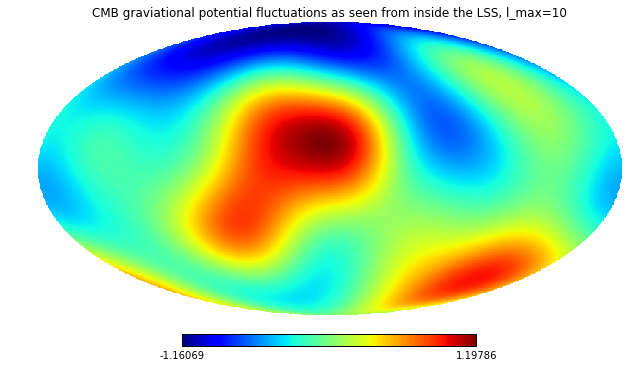

In [9]:
# Give those reconstructed f_n's to one realization of the Universe
We=beatbox.Universe()
We.fn=beatbox.You.reconstrunct_fn
We.transform_3D_potential_into_alm(truncated_nmax=We.truncated_nmax, truncated_nmin=We.truncated_nmin,truncated_lmax=We.truncated_lmax, truncated_lmin=We.truncated_lmin,usedefault=1, fn=1)
We.show_CMB_T_map(from_perspective_of="observer")

In [13]:
# From those f_n's build the 3d spatial potential:
ind = np.where(We.kfilter>0)
NN = 2*len(ind[1])
k_x, k_y, k_z = We.kx[ind], We.ky[ind], We.kz[ind]


RealPhi = np.zeros(We.x.shape,dtype=np.complex128)
for i in range(len(k_x)/2):
    phase = k_x[i] * We.x + k_y[i] * We.y + k_z[i] * We.z
    RealPhi += (We.fn[i] * np.cos(phase)+We.fn[len(k_x)-1-i]*np.sin(phase))*We.Deltak**3
    We.phi = RealPhi.real

yt : [INFO     ] 2016-01-21 14:02:56,060 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-01-21 14:02:56,060 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-01-21 14:02:56,060 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-01-21 14:02:56,061 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-01-21 14:02:56,062 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-01-21 14:02:56,108 Loading field plugins.
yt : [INFO     ] 2016-01-21 14:02:56,109 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-01-21 14:02:56,110 Loaded astro (15 new fields)
yt : [INFO     ] 2016-01-21 14:02:56,111 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-01-21 14:02:56,114 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-01-21 14:02:56,116 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-01-21 14:02:56,117 Loaded geometric (112 ne

1


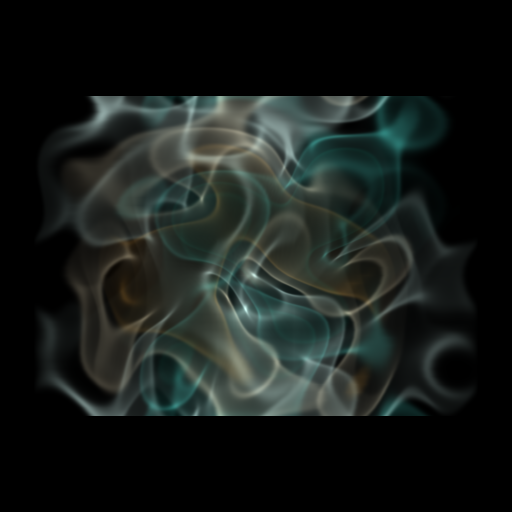

In [20]:
import yt 
We.Pdist=1
We.Pmax=2*np.pi
We.show_potential_with_yt(angle=np.pi/2,  N_layer=5, cmap='BrBG', show3D=1)